<a href="https://colab.research.google.com/github/Nburkhal/DS-Unit-2-Regression-Classification/blob/master/assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [x] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [x] Use scikit-learn for logistic regression.
- [x] Get your validation accuracy score.
- [x] Get and plot your coefficients.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [x] Make exploratory visualizations.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [30]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.0)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [33]:
# Do train/val/test split
X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.80, test_size=0.20, 
    stratify=y_train, random_state=1
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [34]:
# Let's look at the X_train dataframe to see what we're working with
X_train.head()

id  amount_tsh  ...     waterpoint_type waterpoint_type_group
1670   57169         0.0  ...           hand pump             hand pump
50137  43356         0.0  ...           hand pump             hand pump
57558  50692         0.0  ...           hand pump             hand pump
37789  52556      1000.0  ...  communal standpipe    communal standpipe
47266  17357         0.0  ...               other                 other

[5 rows x 40 columns]

In [5]:
# Do one-hot encoding of categorical features
X_train.describe(exclude='number').T.sort_values(by='unique')

count unique                      top   freq
recorded_by            47520      1  GeoData Consultants Ltd  47520
public_meeting         44830      2                     True  40752
permit                 45071      2                     True  31091
source_class           47520      3              groundwater  36619
management_group       47520      5               user-group  41999
quantity_group         47520      5                   enough  26500
quantity               47520      5                   enough  26500
waterpoint_type_group  47520      6       communal standpipe  27728
quality_group          47520      6                     good  40649
payment_type           47520      7                never pay  20212
source_type            47520      7                   spring  13646
waterpoint_type        47520      7       communal standpipe  22883
extraction_type_class  47520      7                  gravity  21502
payment                47520      7                never pay  20212
water_quality          47520      8                     soft  40649
basin                  47520      9            Lake Victoria   8157
source                 47520     10                   spring  13646
scheme_management      44457     12                      VWC  29471
management             47520     12                      vwc  32379
extraction_type_group  47520     13                  gravity  21502
extraction_type        47520     18                  gravity  21502
region                 47520     21                   Iringa   4270
lga                    47520    125                   Njombe   2006
date_recorded          47520    349               2013-02-03    447
funder                 44603   1688   Government Of Tanzania   7265
installer              44588   1912                      DWE  13897
ward                   47520   2082                    Igosi    247
scheme_name            25034   2544                        K    564
subvillage             47225  17247                  Shuleni    402
wpt_name               47520  30672                     none   2897

In [6]:
X_train['quantity'].value_counts(dropna=False)

enough          26500
insufficient    12089
dry              5043
seasonal         3257
unknown           631
Name: quantity, dtype: int64

In [11]:
X_train['extraction_type_class'].value_counts(dropna=False)

gravity         21502
handpump        13176
other            5105
submersible      4936
motorpump        2347
rope pump         359
wind-powered       95
Name: extraction_type_class, dtype: int64

In [9]:
X_train['source_type'].value_counts(dropna=False)

spring                  13646
shallow well            13423
borehole                 9550
river/lake               8339
rainwater harvesting     1822
dam                       520
other                     220
Name: source_type, dtype: int64

In [12]:
# Recombine X_train & y_train for exploratory analysis
train = X_train.copy()
train['status_group'] = y_train

# Groupby
train.groupby('quantity')['status_group'].value_counts(normalize=True)

quantity      status_group           
dry           non functional             0.968075
              functional                 0.025778
              functional needs repair    0.006147
enough        functional                 0.653321
              non functional             0.274604
              functional needs repair    0.072075
insufficient  functional                 0.522128
              non functional             0.380677
              functional needs repair    0.097196
seasonal      functional                 0.578139
              non functional             0.322076
              functional needs repair    0.099785
unknown       non functional             0.711569
              functional                 0.267829
              functional needs repair    0.020602
Name: status_group, dtype: float64

In [13]:
train.groupby('extraction_type_class')['status_group'].value_counts(normalize=True)

extraction_type_class  status_group           
gravity                functional                 0.599619
                       non functional             0.299647
                       functional needs repair    0.100735
handpump               functional                 0.629402
                       non functional             0.310489
                       functional needs repair    0.060109
motorpump              non functional             0.576055
                       functional                 0.377929
                       functional needs repair    0.046016
other                  non functional             0.807640
                       functional                 0.159843
                       functional needs repair    0.032517
rope pump              functional                 0.649025
                       non functional             0.311978
                       functional needs repair    0.038997
submersible            functional                 0.535454
         

In [15]:
train.groupby('source_type')['status_group'].value_counts(normalize=True)

source_type           status_group           
borehole              functional                 0.494346
                      non functional             0.462408
                      functional needs repair    0.043246
dam                   non functional             0.576923
                      functional                 0.386538
                      functional needs repair    0.036538
other                 functional                 0.545455
                      non functional             0.436364
                      functional needs repair    0.018182
rainwater harvesting  functional                 0.603183
                      non functional             0.262898
                      functional needs repair    0.133919
river/lake            functional                 0.539633
                      non functional             0.340209
                      functional needs repair    0.120158
shallow well          functional                 0.495567
                      non 

In [23]:
train.groupby('payment_type')['status_group'].value_counts(normalize=True)

payment_type  status_group           
annually      functional                 0.752610
              non functional             0.178497
              functional needs repair    0.068894
monthly       functional                 0.659985
              non functional             0.227823
              functional needs repair    0.112191
never pay     non functional             0.474669
              functional                 0.450574
              functional needs repair    0.074758
on failure    functional                 0.623070
              non functional             0.305389
              functional needs repair    0.071541
other         functional                 0.572296
              non functional             0.308627
              functional needs repair    0.119077
per bucket    functional                 0.673106
              non functional             0.281862
              functional needs repair    0.045031
unknown       non functional             0.515096
            

In [36]:
train.groupby('quality_group')['status_group'].value_counts(normalize=True)

quality_group  status_group           
colored        functional                 0.490862
               non functional             0.409922
               functional needs repair    0.099217
fluoride       functional                 0.717514
               non functional             0.237288
               functional needs repair    0.045198
good           functional                 0.566016
               non functional             0.356860
               functional needs repair    0.077124
milky          functional                 0.538341
               non functional             0.441315
               functional needs repair    0.020344
salty          non functional             0.479528
               functional                 0.465318
               functional needs repair    0.055154
unknown        non functional             0.842763
               functional                 0.136842
               functional needs repair    0.020395
Name: status_group, dtype: float64

In [46]:
train.groupby('waterpoint_type')['status_group'].value_counts(normalize=True)

waterpoint_type              status_group           
cattle trough                functional                 0.726190
                             non functional             0.261905
                             functional needs repair    0.011905
communal standpipe           functional                 0.622427
                             non functional             0.299043
                             functional needs repair    0.078530
communal standpipe multiple  non functional             0.529205
                             functional                 0.361197
                             functional needs repair    0.109598
dam                          functional                 0.750000
                             non functional             0.250000
hand pump                    functional                 0.616801
                             non functional             0.324388
                             functional needs repair    0.058811
improved spring              function

In [50]:
train.groupby('management')['status_group'].value_counts(normalize=True)

management        status_group           
company           non functional             0.598527
                  functional                 0.379374
                  functional needs repair    0.022099
other             functional                 0.605655
                  non functional             0.334821
                  functional needs repair    0.059524
other - school    non functional             0.746667
                  functional                 0.253333
parastatal        functional                 0.578424
                  non functional             0.306600
                  functional needs repair    0.114975
private operator  functional                 0.742964
                  non functional             0.233896
                  functional needs repair    0.023139
trust             functional                 0.593220
                  non functional             0.338983
                  functional needs repair    0.067797
unknown           non functional        

In [56]:
train.groupby('basin')['status_group'].value_counts(normalize=True)

basin                    status_group           
Internal                 functional                 0.576364
                         non functional             0.353407
                         functional needs repair    0.070229
Lake Nyasa               functional                 0.657303
                         non functional             0.294089
                         functional needs repair    0.048608
Lake Rukwa               non functional             0.472727
                         functional                 0.413636
                         functional needs repair    0.113636
Lake Tanganyika          functional                 0.478025
                         non functional             0.403679
                         functional needs repair    0.118296
Lake Victoria            functional                 0.497977
                         non functional             0.404928
                         functional needs repair    0.097095
Pangani                  functional 

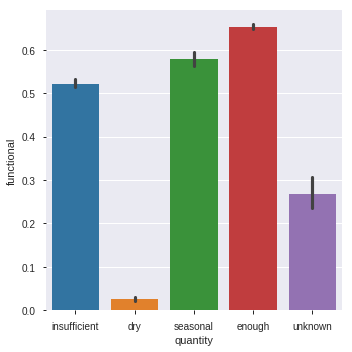

In [16]:
# One-hot encode quantity, extraction_type_class, and source_type
train['functional'] = (train['status_group'] == 'functional').astype(int)

sns.catplot(x='quantity', y='functional', data=train, kind='bar');

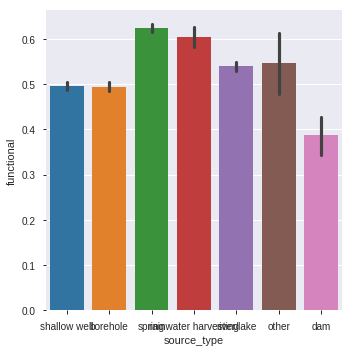

In [17]:
sns.catplot(x='source_type', y='functional', data=train, kind='bar');

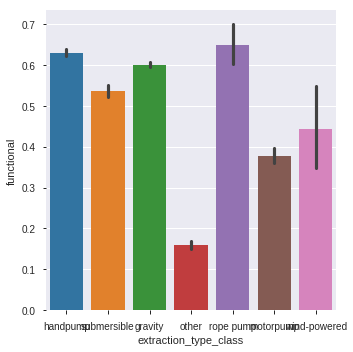

In [18]:
sns.catplot(x='extraction_type_class', y='functional', data=train, kind='bar');

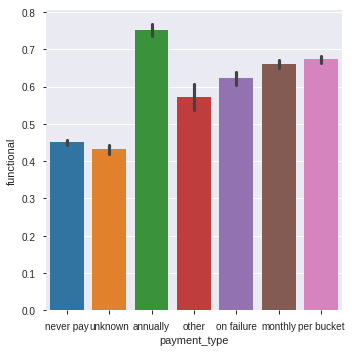

In [24]:
sns.catplot(x='payment_type', y='functional', data=train, kind='bar');

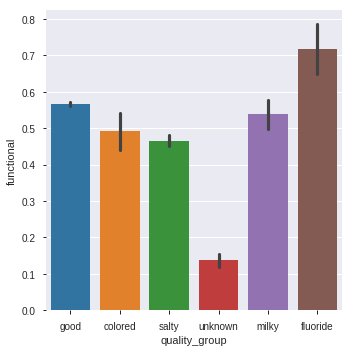

In [37]:
sns.catplot(x='quality_group', y='functional', data=train, kind='bar');

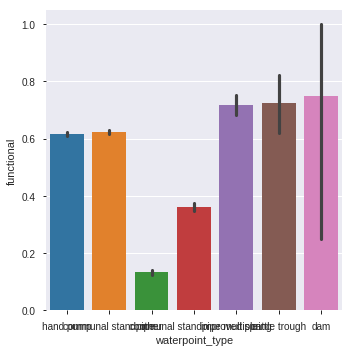

In [47]:
sns.catplot(x='waterpoint_type', y='functional', data=train, kind='bar');

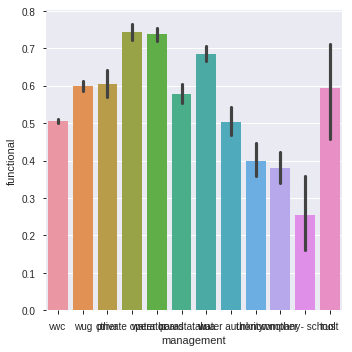

In [51]:
sns.catplot(x='management', y='functional', data=train, kind='bar');

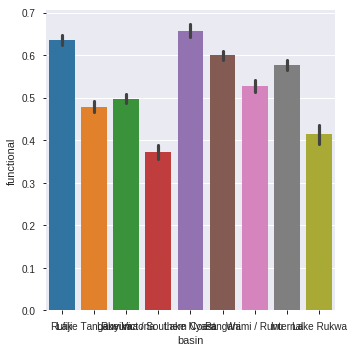

In [57]:
sns.catplot(x='basin', y='functional', data=train, kind='bar');

In [59]:
# Let's look at out lat & long values and see what we've got going on there
px.scatter(train, x='longitude', y='latitude', color='status_group')

In [63]:
# And put it on a map
px.set_mapbox_access_token('')
px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', zoom=3)

In [74]:
# Cluster the locations
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_jobs=-1)
train['cluster'] = kmeans.fit_predict(train[['longitude', 'latitude']])
X_train['cluster'] = kmeans.fit_predict(X_train[['longitude', 'latitude']])
X_val['cluster'] = kmeans.fit_predict(X_val[['longitude', 'latitude']])
px.scatter_mapbox(train, lat='latitude', lon='longitude', color='cluster', zoom=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [70]:
train.groupby('cluster')['status_group'].value_counts(normalize=True)

cluster  status_group           
0        functional                 0.510665
         non functional             0.435167
         functional needs repair    0.054168
1        functional                 0.480277
         non functional             0.300346
         functional needs repair    0.219377
2        functional                 0.686210
         non functional             0.276363
         functional needs repair    0.037427
3        functional                 0.630981
         non functional             0.305523
         functional needs repair    0.063497
4        functional                 0.544451
         non functional             0.414003
         functional needs repair    0.041546
5        non functional             0.604153
         functional                 0.324180
         functional needs repair    0.071668
6        functional                 0.445645
         non functional             0.383879
         functional needs repair    0.170476
7        functional   

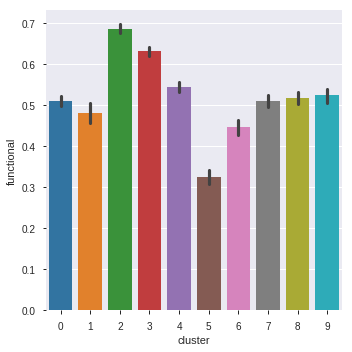

In [72]:
sns.catplot(x='cluster', y='functional', data=train, kind='bar');

In [76]:
# Set X_train & X_val cluster columns as str
#X_train['cluster'] = X_train['cluster'].astype(str)
#X_val['cluster'] = X_val['cluster'].astype(str)

categorical_features = ['quantity', 'source_type', 'payment_type', 
                        'extraction_type_class', 'quality_group', 
                        'management', 'waterpoint_type', 'basin']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

# Create subsets to perform our test on
X_train_subset = X_train[features]
X_val_subset = X_val[features]

# Create encoder
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

# Create scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# Create our model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Get accuracy score
print('Validation Accuracy:', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Validation Accuracy: 0.7251683501683501


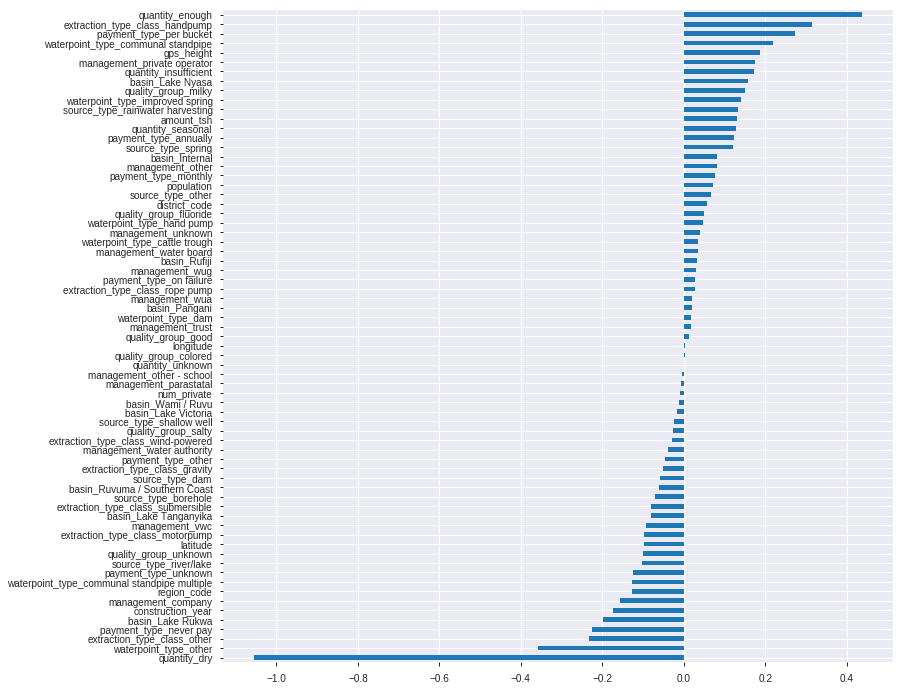

In [77]:
# Get & plot our coefficients
functional_coefficients = pd.Series(
    model.coef_[0], 
    X_train_encoded.columns
)

plt.figure(figsize=(12, 12))
functional_coefficients.sort_values().plot.barh();

In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
assert all(X_test_encoded.columns == X_train_encoded.columns)

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Burkhalter_DS6_Unit2_submission-01.csv', index=False)

In [80]:
!head Burkhalter_DS6_Unit2_submission-01.csv

id,status_group
50785,non functional
51630,functional
17168,non functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,functional


In [0]:
if in_colab:
    from google.colab import files
    # Just try again if you get this error:
    # TypeError: Failed to fetch
    # https://github.com/googlecolab/colabtools/issues/337
    files.download('Burkhalter_DS6_Unit2_submission-01.csv')